In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error

In [74]:
# Original housing dataset
data = {
    "Size (sqft)": [2000, 1500, 1800, 1200, 2500],
    "Bedrooms": [3, 2, 3, 2, 4],
    "Bathrooms": [2, 1, 2, 1, 3],
    "Location Score": [8, 7, 9, 6, 10],
    "Price ($)": [300000, 200000, 250000, 180000, 500000]
}



In [75]:
df = pd.DataFrame(data)

In [76]:
X = df[["Size (sqft)"]]
y = df["Price ($)"]

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

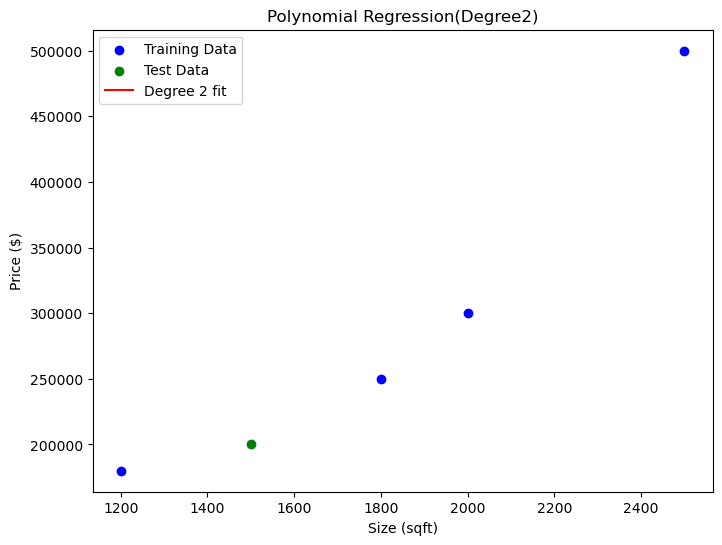

Degree {degree} Polynomial Regression
Mean Squared Error: 6596396.18
--------------------------------------------------


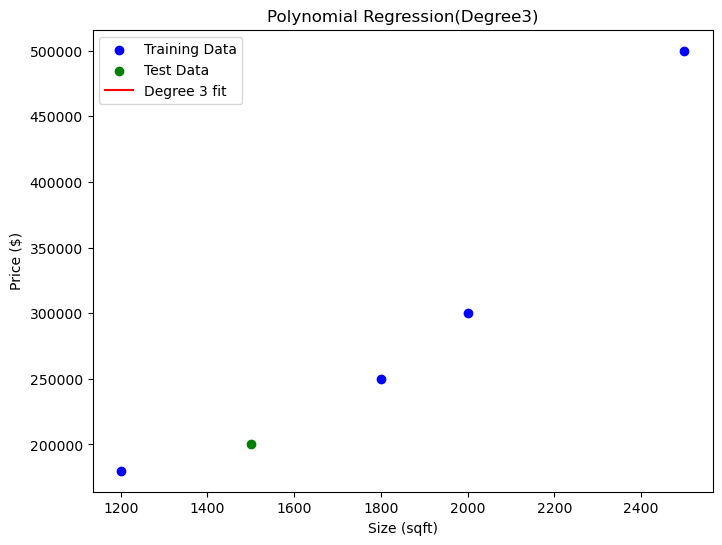

Degree {degree} Polynomial Regression
Mean Squared Error: 2717063.19
--------------------------------------------------


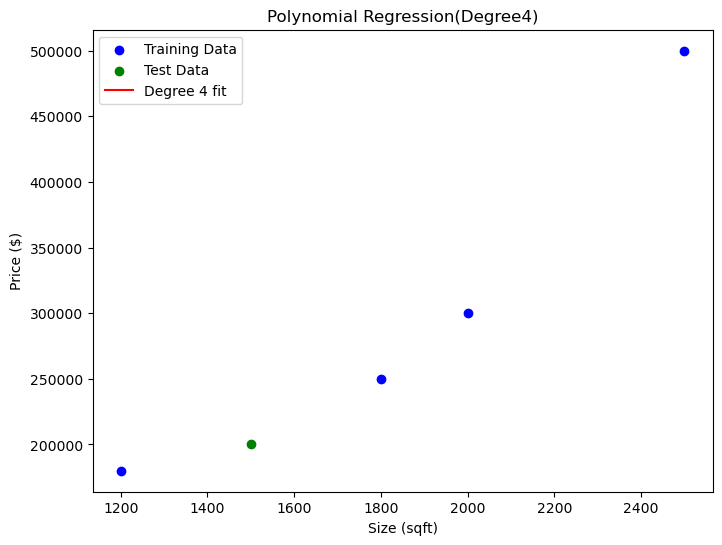

Degree {degree} Polynomial Regression
Mean Squared Error: 3247387.71
--------------------------------------------------


In [78]:
# Function to fit and visualize polynomial regression for various degrees

def polynomial_regression_alaysis(degree):
    # Create Polynomial Regression Model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test,y_pred)

    # Visualize the results

    plt.figure(figsize=(8,6))
    plt.scatter(X_train, y_train, color='blue', label="Training Data")
    plt.scatter(X_test, y_test, color='green', label="Test Data")
    plt.plot(X_test, y_pred, color='red', label=f"Degree {degree} fit")
    plt.title(f"Polynomial Regression(Degree{degree})")
    plt.xlabel("Size (sqft)")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.show()

    print("Degree {degree} Polynomial Regression")
    print(f"Mean Squared Error: {mse:.2f}")
    print("-"* 50)



# Test Polynomial Regression for degrees 2,3 and 4
for degree in [2, 3, 4]:
    polynomial_regression_alaysis(degree)
